 Project Title :  Analyzing Historical Stock/Revenue Data and Building a Dashboard

In [3]:
!pip install yfinance pandas matplotlib beautifulsoup4 requests

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Q1: Tesla Stock Data Using yfinance

import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()  # Show first 5 rows

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
!pip install html5lib

Defaulting to user installation because normal site-packages is not writeable


In [9]:
# Q2: Tesla Revenue Data Using Web Scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Set headers to fake a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch page with headers
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Locate Tesla revenue table
tables = soup.find_all("table")
tesla_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

# Raise an error if not found
if tesla_table is None:
    raise Exception("Tesla Revenue table not found.")

# Parse table into DataFrame
tesla_revenue = pd.read_html(str(tesla_table))[0]

# Clean the DataFrame
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("[$,]", "", regex=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue.dropna(inplace=True)

# Display last 5 rows
print(tesla_revenue.tail())


          Date  Revenue
58  2010-09-30     31.0
59  2010-06-30     28.0
60  2010-03-31     21.0
62  2009-09-30     46.0
63  2009-06-30     27.0


C:\Users\150LAB\AppData\Local\Temp\ipykernel_8724\3477842769.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_table))[0]


In [11]:
# Q3: GameStop Stock Data Using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()  # Show first 5 rows

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [13]:
# Q4: GameStop Revenue Data Using Web Scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Add headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the GameStop revenue table
tables = soup.find_all("table")
gme_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_table = table
        break

if gme_table is None:
    raise Exception("GameStop revenue table not found!")

# Convert to DataFrame
gme_revenue = pd.read_html(str(gme_table))[0]
gme_revenue.columns = ["Date", "Revenue"]

# Clean Revenue
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("[$,]", "", regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue.dropna(inplace=True)

# Show last 5 rows
print(gme_revenue.tail())


          Date  Revenue
61  2010-01-31     3524
62  2009-10-31     1835
63  2009-07-31     1739
64  2009-04-30     1981
65  2009-01-31     3492


C:\Users\150LAB\AppData\Local\Temp\ipykernel_8724\1647146757.py:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_table))[0]


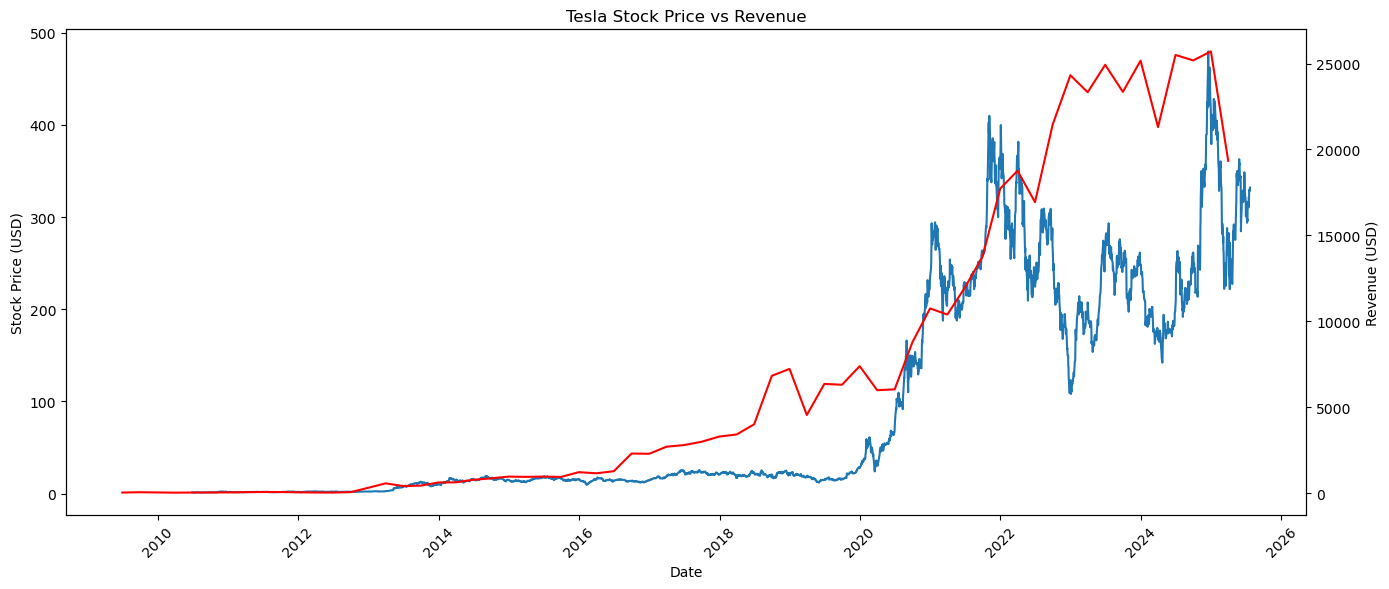

In [15]:
# Q5:  Tesla Stock and Revenue Dashboard 
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)")
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(pd.to_datetime(revenue_data['Date']), revenue_data['Revenue'].astype(float), color='red', label="Revenue")
    ax2.set_ylabel("Revenue (USD)")

    plt.title(f"{stock_name} Stock Price vs Revenue")
    fig.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla")


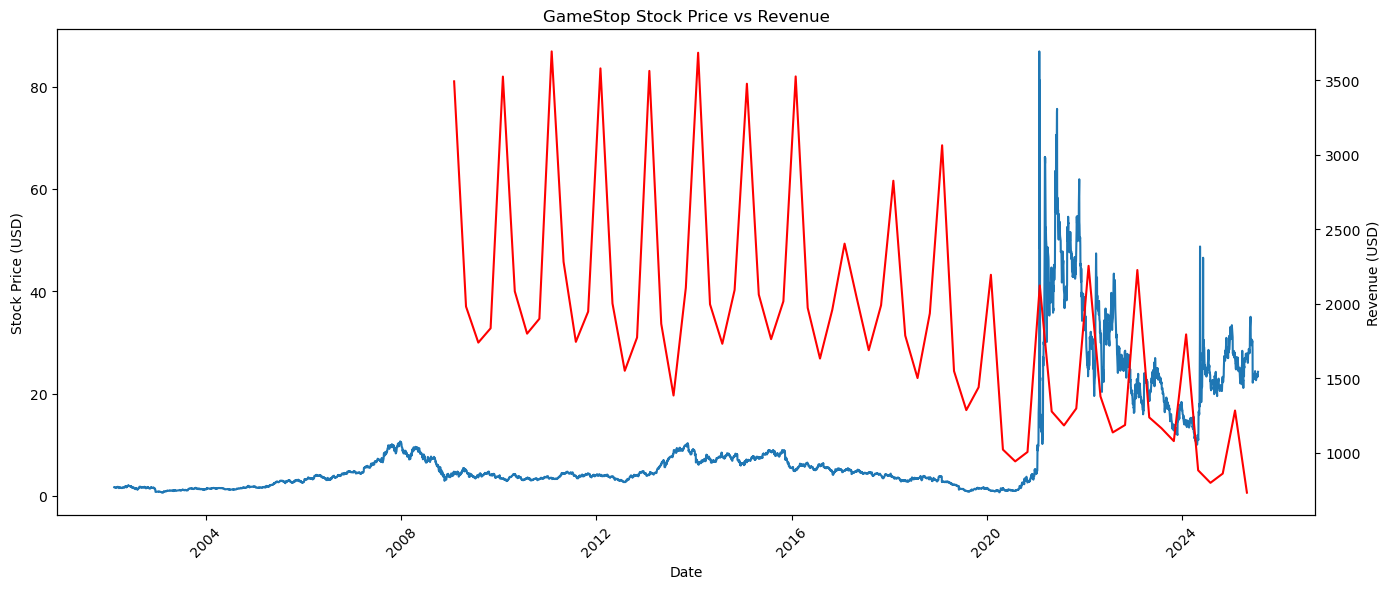

In [17]:
# Q6: GameStop Stock vs Revenue Dashboard

make_graph(gme_data, gme_revenue, "GameStop")
